In [1]:
# import dependencies
import pandas as pd
import numpy as np
import requests
import json
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import mapclassify as mc
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import linregress

In [ ]:
# install additional dependencies 
#!pip install geopandas
#!pip install geoplot
#!pip install mapclassify

In [2]:
# open data api key for multiple chronic diseases from CDC
base_url = "https://data.cms.gov/data-api/v1/dataset/b736b4bd-3020-4343-b3dc-0010082ccc77/data?"

In [3]:
# To retrieve large json data
json_data = []  # To store all the data

# Set up pagination
page = 0
page_size = 5000  # Adjust the page size 

while True:
    query_url = f"{base_url}size={page_size}&offset={page}"
    response = requests.get(query_url).json()
    json_data.extend(response)

    if len(json_data) < page:
        # Break the loop if all data has been retrieved
        break

    page += page_size

In [4]:
# Convert data into a Pandas DataFrame
mcc_df = pd.DataFrame(json_data)
print(mcc_df.shape)
mcc_df.head()

(44976, 12)


,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_MCC,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
0,State,Alabama,01,65+,All,All,0 to 1,0.2318,1999.566,1806.2546,0.0464,127.2703
1,State,Alabama,01,65+,All,All,2 to 3,0.2911,5198.6566,4738.4133,0.0589,307.573
2,State,Alabama,01,65+,All,All,4 to 5,0.2604,9896.6809,9017.293,0.0936,576.8055
3,State,Alabama,01,65+,All,All,6+,0.2168,27177.0547,24715.7787,0.2071,1594.5694
4,State,Alabama,01,65+,Dual Status,Medicare Only,0 to 1,0.2473,1982.6565,1790.6022,0.0468,117.0981


In [5]:
mcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44976 entries, 0 to 44975
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Bene_Geo_Lvl              44976 non-null  object
 1   Bene_Geo_Desc             44976 non-null  object
 2   Bene_Geo_Cd               44976 non-null  object
 3   Bene_Age_Lvl              44976 non-null  object
 4   Bene_Demo_Lvl             44976 non-null  object
 5   Bene_Demo_Desc            44976 non-null  object
 6   Bene_MCC                  44976 non-null  object
 7   Prvlnc                    44976 non-null  object
 8   Tot_Mdcr_Stdzd_Pymt_PC    44976 non-null  object
 9   Tot_Mdcr_Pymt_PC          44976 non-null  object
 10  Hosp_Readmsn_Rate         44976 non-null  object
 11  ER_Visits_Per_1000_Benes  44976 non-null  object
dtypes: object(12)
memory usage: 4.1+ MB


In [6]:
# Rename all the columns to descriptive columns
mcc_df = mcc_df.rename(columns = {
    "Bene_Geo_Lvl": "Beneficiary_Geographic_Level",
    "Bene_Geo_Desc" : "Beneficiary_Geographic_Description",
    "Bene_Geo_Cd" : "Beneficiary_Geographic_Code",
    "Bene_Age_Lvl" : "Beneficiary_Age_Level",
    "Bene_Demo_Lvl" : "Beneficiary_Demographic_Level",
    "Bene_Demo_Desc" : "Beneficiary_Demographic_Description",
    "Bene_MCC" : "Beneficiary_Multiple_Chronic_Condition_Group",
    "Prvlnc" : "Prevalence",
    "Tot_Mdcr_Stdzd_Pymt_PC" : "Total_Medicare_Standardized_Per_Capita_Spending",
    "Tot_Mdcr_Pymt_PC" : "Total_Medicare_Per_Capita_Spending",
    "Hosp_Readmsn_Rate" : "Hospital_Readmission_Rate",
    "ER_Visits_Per_1000_Benes" : "Emergency_Room_Visits_per_1,000_Beneficiaries",
})
mcc_df.head()

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,State,Alabama,01,65+,All,All,0 to 1,0.2318,1999.566,1806.2546,0.0464,127.2703
1,State,Alabama,01,65+,All,All,2 to 3,0.2911,5198.6566,4738.4133,0.0589,307.573
2,State,Alabama,01,65+,All,All,4 to 5,0.2604,9896.6809,9017.293,0.0936,576.8055
3,State,Alabama,01,65+,All,All,6+,0.2168,27177.0547,24715.7787,0.2071,1594.5694
4,State,Alabama,01,65+,Dual Status,Medicare Only,0 to 1,0.2473,1982.6565,1790.6022,0.0468,117.0981


In [7]:
# changing the datatype from object to numeric (float as default)
mcc_df[["Prevalence","Total_Medicare_Standardized_Per_Capita_Spending", \
               "Total_Medicare_Per_Capita_Spending", "Hospital_Readmission_Rate", \
              "Emergency_Room_Visits_per_1,000_Beneficiaries"]] = \
mcc_df[["Prevalence","Total_Medicare_Standardized_Per_Capita_Spending", \
               "Total_Medicare_Per_Capita_Spending", "Hospital_Readmission_Rate", \
              "Emergency_Room_Visits_per_1,000_Beneficiaries"]].apply(pd.to_numeric, errors='coerce')

In [8]:
print(mcc_df.shape)
mcc_df.info()

(44976, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44976 entries, 0 to 44975
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Beneficiary_Geographic_Level                     44976 non-null  object 
 1   Beneficiary_Geographic_Description               44976 non-null  object 
 2   Beneficiary_Geographic_Code                      44976 non-null  object 
 3   Beneficiary_Age_Level                            44976 non-null  object 
 4   Beneficiary_Demographic_Level                    44976 non-null  object 
 5   Beneficiary_Demographic_Description              44976 non-null  object 
 6   Beneficiary_Multiple_Chronic_Condition_Group     44976 non-null  object 
 7   Prevalence                                       41260 non-null  float64
 8   Total_Medicare_Standardized_Per_Capita_Spending  41232 non-null  float64
 9   Total_Medicare_P

## Beneficiary geographical level is at National, State and County level. Observing and analyzing at State level mainly

### Observing the dataset at State level

In [9]:
# State level needs three steps of filtering based on state, age level - all category and demography level - all
state_s = mcc_df["Beneficiary_Geographic_Level"] == "State"
beneficiary_age_all_s = mcc_df["Beneficiary_Age_Level"] == "All"
beneficiary_demo_all_s = mcc_df["Beneficiary_Demographic_Level"] == "All"
state_age_demo_s = state_s & beneficiary_age_all_s & beneficiary_demo_all_s

In [10]:
print(mcc_df.columns)

Index(['Beneficiary_Geographic_Level', 'Beneficiary_Geographic_Description',
       'Beneficiary_Geographic_Code', 'Beneficiary_Age_Level',
       'Beneficiary_Demographic_Level', 'Beneficiary_Demographic_Description',
       'Beneficiary_Multiple_Chronic_Condition_Group', 'Prevalence',
       'Total_Medicare_Standardized_Per_Capita_Spending',
       'Total_Medicare_Per_Capita_Spending', 'Hospital_Readmission_Rate',
       'Emergency_Room_Visits_per_1,000_Beneficiaries'],
      dtype='object')


In [11]:
# Make a dataframe based on State
mcc_state_df = mcc_df.loc[state_age_demo_s]
mcc_state_df = mcc_state_df.reset_index(drop=True)
print(mcc_state_df.shape)
mcc_state_df.head()

(216, 12)


,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,State,Alabama,01,All,All,All,0 to 1,0.2621,2091.9398,1887.2548,0.0590,226.9723
1,State,Alabama,01,All,All,All,2 to 3,0.2874,5545.1296,5039.7988,0.0814,439.7410
2,State,Alabama,01,All,All,All,4 to 5,0.2481,10383.4301,9451.8262,0.1098,724.2161
3,State,Alabama,01,All,All,All,6+,0.2024,27980.7920,25491.2797,0.2212,1851.6498
4,State,Alaska,02,All,All,All,0 to 1,0.4805,1822.9275,2202.1402,0.0535,163.5787


In [12]:
# looking for any missing state code
mcc_state_df["Beneficiary_Geographic_Code"].unique()

array(['01', '02', '04', '05', '06', '08', '09', '10', '11', '12', '13',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '', '44', '45', '46', '47',
       '48', '49', '50', '51', '53', '54', '55', '56'], dtype=object)

In [13]:
# looking for any missing state name or blanks
mcc_state_df["Beneficiary_Geographic_Description"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Unknown', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [14]:
# filtering out for unknown state
filtered_state_df = mcc_state_df[mcc_state_df["Beneficiary_Geographic_Description"] != "Unknown"]
print(filtered_state_df.shape)
filtered_state_df.head()

(212, 12)


,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,State,Alabama,01,All,All,All,0 to 1,0.2621,2091.9398,1887.2548,0.0590,226.9723
1,State,Alabama,01,All,All,All,2 to 3,0.2874,5545.1296,5039.7988,0.0814,439.7410
2,State,Alabama,01,All,All,All,4 to 5,0.2481,10383.4301,9451.8262,0.1098,724.2161
3,State,Alabama,01,All,All,All,6+,0.2024,27980.7920,25491.2797,0.2212,1851.6498
4,State,Alaska,02,All,All,All,0 to 1,0.4805,1822.9275,2202.1402,0.0535,163.5787


In [15]:
# check for territories state code
filtered_state_df.loc[filtered_state_df["Beneficiary_Geographic_Description"] == "Puerto Rico"]

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
156,State,Puerto Rico,,All,All,All,0 to 1,0.3120,950.9322,789.9499,NaN,128.5301
157,State,Puerto Rico,,All,All,All,2 to 3,0.2364,4680.6115,3893.1890,0.1400,375.8651
158,State,Puerto Rico,,All,All,All,4 to 5,0.2556,7872.3560,6635.8695,0.1546,579.7826
159,State,Puerto Rico,,All,All,All,6+,0.1959,15837.3675,13683.2346,0.2384,1240.6473


In [16]:
# check for territories state code
filtered_state_df.loc[filtered_state_df["Beneficiary_Geographic_Description"] == "Virgin Islands"]

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
192,State,Virgin Islands,,All,All,All,0 to 1,0.4794,1061.0723,1087.4327,0.0924,156.9133
193,State,Virgin Islands,,All,All,All,2 to 3,0.3065,3412.3572,3661.2454,0.0892,388.0022
194,State,Virgin Islands,,All,All,All,4 to 5,0.1585,8575.1651,9618.9572,0.2230,748.4924
195,State,Virgin Islands,,All,All,All,6+,0.0556,32195.1615,36558.2015,0.2694,2344.1296


In [17]:
# check dataframe for state name
filtered_state_df["Beneficiary_Geographic_Description"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

### Noticed that two states/territories Puerto Rico and Virgin Islands do not have Beneficiary_Geographic_Code mentioned but have data associated with it. Adding a state code would include those two state code. 

In [18]:
# Adding the state code of Puerto Rico and Virgin islands
# this function would replace for null or blank values
# Define a mapping dictionary for the replacements
state_code_mapping = {
    "Puerto Rico": "72",
    "Virgin Islands": "78"
}
# Use numpy.where() to replace blanks based on conditions
filtered_state_df['Beneficiary_Geographic_Code'] = np.where(filtered_state_df['Beneficiary_Geographic_Code'].isnull() | filtered_state_df['Beneficiary_Geographic_Code'].eq(''), 
                            filtered_state_df['Beneficiary_Geographic_Description'].map(state_code_mapping), 
                            filtered_state_df['Beneficiary_Geographic_Code'])

In [19]:
# Viewing the dataframe for added state code
filtered_state_df.loc[filtered_state_df["Beneficiary_Geographic_Description"] == "Puerto Rico"]

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
156,State,Puerto Rico,72,All,All,All,0 to 1,0.3120,950.9322,789.9499,NaN,128.5301
157,State,Puerto Rico,72,All,All,All,2 to 3,0.2364,4680.6115,3893.1890,0.1400,375.8651
158,State,Puerto Rico,72,All,All,All,4 to 5,0.2556,7872.3560,6635.8695,0.1546,579.7826
159,State,Puerto Rico,72,All,All,All,6+,0.1959,15837.3675,13683.2346,0.2384,1240.6473


In [20]:
print(filtered_state_df.shape)

(212, 12)


In [21]:
# Drop rows with blanks in the specified column
columns_to_drop = ["Beneficiary_Geographic_Description", "Prevalence", \
                   "Total_Medicare_Standardized_Per_Capita_Spending", \
                   "Total_Medicare_Per_Capita_Spending", "Hospital_Readmission_Rate", \
                   "Emergency_Room_Visits_per_1,000_Beneficiaries"]

filtered_state_df.dropna(subset=columns_to_drop, inplace=True)
print(filtered_state_df.shape)
# Viewing the dataframe
filtered_state_df.head()

(211, 12)


,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,State,Alabama,01,All,All,All,0 to 1,0.2621,2091.9398,1887.2548,0.0590,226.9723
1,State,Alabama,01,All,All,All,2 to 3,0.2874,5545.1296,5039.7988,0.0814,439.7410
2,State,Alabama,01,All,All,All,4 to 5,0.2481,10383.4301,9451.8262,0.1098,724.2161
3,State,Alabama,01,All,All,All,6+,0.2024,27980.7920,25491.2797,0.2212,1851.6498
4,State,Alaska,02,All,All,All,0 to 1,0.4805,1822.9275,2202.1402,0.0535,163.5787


In [22]:
# summary statistics of State level data
filtered_state_df.describe()

,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
count,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.249706,11921.467982,12694.838072,0.117551,867.768454
std,0.081075,10527.325796,11590.981079,0.065832,728.188865
min,0.055600,1061.072300,1087.432700,0.044800,142.074200
25%,0.188600,3856.739500,3777.217200,0.069700,323.308250
50%,0.249400,7872.356000,7849.250000,0.094800,580.872300
75%,0.295350,14613.341850,15997.919100,0.182200,1139.314600
max,0.480600,34965.464500,42263.488100,0.281200,2833.349800


## Visualizing the prevalence of MCC group 6+ in every state of US using the geometry co-ordinates through geoJSON data

In [23]:
# GeoJSON data - new test json
jsonData = requests.get("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json").json()
gdf = gpd.GeoDataFrame(jsonData)
print(gdf.shape)
gdf.head(3)

(52, 2)


,type,features
0,FeatureCollection,"{'type': 'Feature', 'id': '01', 'properties': ..."
1,FeatureCollection,"{'type': 'Feature', 'id': '02', 'properties': ..."
2,FeatureCollection,"{'type': 'Feature', 'id': '04', 'properties': ..."


In [24]:
# extracting the feature column for state name and geometry
gdf2 = gpd.GeoDataFrame.from_features(gdf['features'])
gdf2 = gdf2.explode()
print(gdf2.shape)
gdf2.head(3)

(103, 3)


name  density                                           geometry
0 0  Alabama   94.650  POLYGON ((-87.35930 35.00118, -85.60667 34.984...
1 0   Alaska    1.264  POLYGON ((-131.60202 55.11798, -131.56916 55.2...
  1   Alaska    1.264  POLYGON ((-131.83205 55.42469, -131.64584 55.3...

In [25]:
# selecting the state name and geometry columns only
gdf2 = gdf2[["name", "geometry"]]

In [26]:
# reset the indexes
gdf2 = gdf2.reset_index(drop=True)
print(gdf2.shape)
gdf2.head()

(103, 2)


,name,geometry
0,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,Alaska,"POLYGON ((-131.60202 55.11798, -131.56916 55.2..."
2,Alaska,"POLYGON ((-131.83205 55.42469, -131.64584 55.3..."
3,Alaska,"POLYGON ((-132.97673 56.43792, -132.73575 56.4..."
4,Alaska,"POLYGON ((-133.59563 56.35029, -133.16295 56.3..."


In [27]:
# Keeping the required columns to merge with geoJSON data to plot geomaps
mcc_filtered_state_subset_df = filtered_state_df[["Beneficiary_Geographic_Description", \
                                                  "Beneficiary_Geographic_Code", \
                                                  "Prevalence",\
                                                  "Beneficiary_Multiple_Chronic_Condition_Group",\
                                                  "Total_Medicare_Standardized_Per_Capita_Spending",\
                                                  "Total_Medicare_Per_Capita_Spending",\
                                                  "Hospital_Readmission_Rate",\
                                                  "Emergency_Room_Visits_per_1,000_Beneficiaries"]]
# subset for MCC group 6+
mcc_state_grp6_df = mcc_filtered_state_subset_df.loc[mcc_filtered_state_subset_df["Beneficiary_Multiple_Chronic_Condition_Group"] \
                                                     == "6+"]

print(mcc_state_grp6_df.shape)
mcc_state_grp6_df.head()

(53, 8)


,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Prevalence,Beneficiary_Multiple_Chronic_Condition_Group,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
3,Alabama,01,0.2024,6+,27980.7920,25491.2797,0.2212,1851.6498
7,Alaska,02,0.0917,6+,29048.2325,41135.6121,0.2079,2321.8067
11,Arizona,04,0.1404,6+,28687.5444,31289.2405,0.2145,1870.5914
15,Arkansas,05,0.1652,6+,30192.1977,28170.4351,0.2295,2082.9493
19,California,06,0.1656,6+,30064.5780,38790.6673,0.2363,1902.1314


In [28]:
# add the json to into mcc_state_grp6_df dataset
mcc_merged_state_gdf_df = mcc_state_grp6_df.merge(gdf2, left_on=["Beneficiary_Geographic_Description"], right_on=["name"])
print(mcc_merged_state_gdf_df.shape)
mcc_merged_state_gdf_df.head(3)

(103, 10)


,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Prevalence,Beneficiary_Multiple_Chronic_Condition_Group,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries",name,geometry
0,Alabama,01,0.2024,6+,27980.7920,25491.2797,0.2212,1851.6498,Alabama,"POLYGON ((-87.35930 35.00118, -85.60667 34.984..."
1,Alaska,02,0.0917,6+,29048.2325,41135.6121,0.2079,2321.8067,Alaska,"POLYGON ((-131.60202 55.11798, -131.56916 55.2..."
2,Alaska,02,0.0917,6+,29048.2325,41135.6121,0.2079,2321.8067,Alaska,"POLYGON ((-131.83205 55.42469, -131.64584 55.3..."


In [29]:
# Specifying the total_bounds
merged_state_gdf = gpd.GeoDataFrame(mcc_merged_state_gdf_df)
bounds = merged_state_gdf.total_bounds
print(bounds)

# Check for valid geometries
# print(merged_state_gdf.geometry.is_valid)

[-188.90491    17.929556  -65.626797   71.351633]


In [30]:
# Remove data from index 62 and 92
index_to_remove = [62, 95]
merged_state_gdf = merged_state_gdf.drop(index_to_remove)

# Check the updated GeoDataFrame
# print(merged_state_gdf)

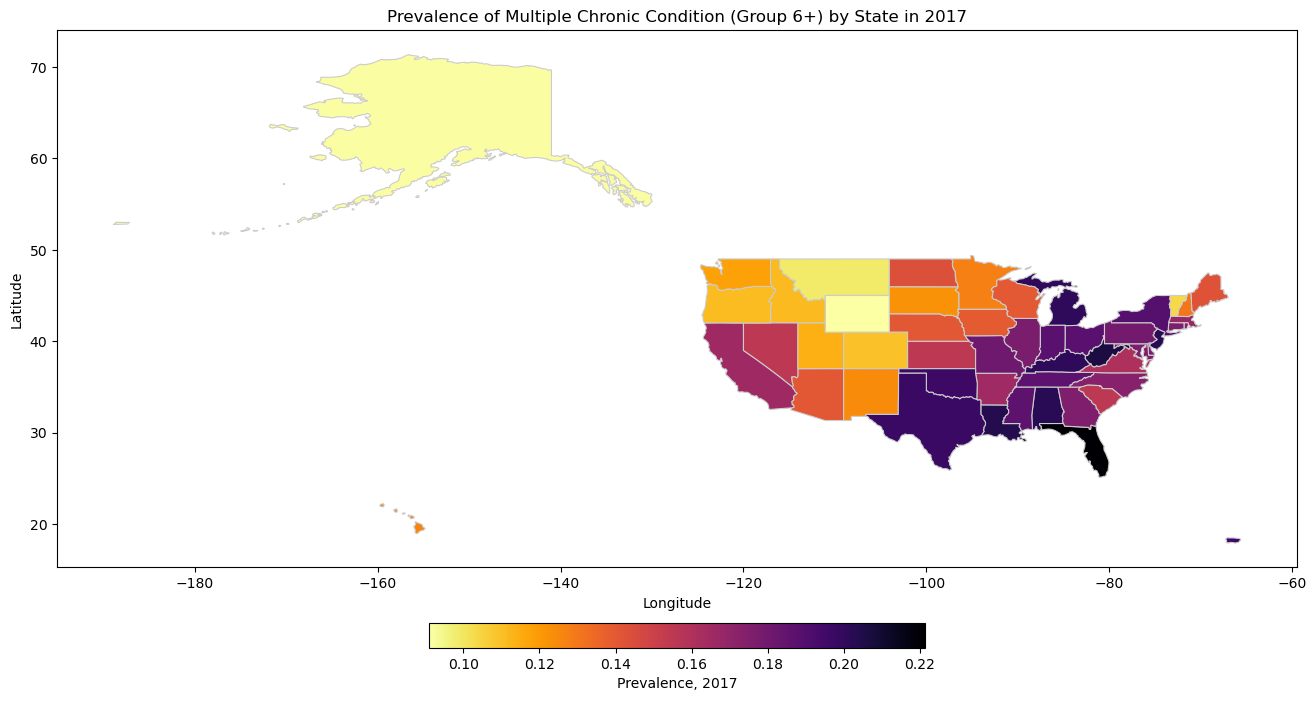

In [31]:
# Plot Prevalence on USA map
fig, ax = plt.subplots(figsize=(16, 12))

# Set the color map
cmap = 'inferno_r'

# Plot the choropleth map using 'plot()' function of GeoDataFrame
merged_state_gdf.plot(column='Prevalence', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,\
               legend_kwds={"label": "Prevalence, 2017", "orientation": "horizontal", "shrink" : 0.4, "pad": 0.06},)

# Customize the plot
ax.set_title('Prevalence of Multiple Chronic Condition (Group 6+) by State in 2017')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the plot
plt.show()

In [32]:
# Filtering for 'All' at state level
mcc_df_state_all_df = mcc_state_df.loc[(mcc_state_df["Beneficiary_Age_Level"] == "All") \
                                       & (mcc_state_df["Beneficiary_Demographic_Level"] == "All") \
                                       & (mcc_state_df["Beneficiary_Geographic_Level"] == "State"), :]
mcc_df_state_all_df.head()

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,State,Alabama,01,All,All,All,0 to 1,0.2621,2091.9398,1887.2548,0.0590,226.9723
1,State,Alabama,01,All,All,All,2 to 3,0.2874,5545.1296,5039.7988,0.0814,439.7410
2,State,Alabama,01,All,All,All,4 to 5,0.2481,10383.4301,9451.8262,0.1098,724.2161
3,State,Alabama,01,All,All,All,6+,0.2024,27980.7920,25491.2797,0.2212,1851.6498
4,State,Alaska,02,All,All,All,0 to 1,0.4805,1822.9275,2202.1402,0.0535,163.5787


In [33]:
# aggregate across all multiple chronic conditions counts, get mean for some columns
mcc_df_totals_for_states_df = mcc_df_state_all_df.groupby("Beneficiary_Geographic_Description")["Prevalence", "Hospital_Readmission_Rate", "Emergency_Room_Visits_per_1,000_Beneficiaries"].mean()
mcc_df_totals_for_states_df.head()

,Prevalence,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
Beneficiary_Geographic_Description,,,
Alabama,0.250000,0.117850,810.644800
Alaska,0.250000,0.109375,996.158075
Arizona,0.250000,0.108350,779.631450
Arkansas,0.250000,0.120875,877.471125
California,0.249975,0.118900,792.351925


In [34]:
# aggregate across all multiple chronic conditions counts, get mean for some columns
mcc_df_totals_for_states_df = filtered_state_df.groupby("Beneficiary_Geographic_Description")["Prevalence", "Hospital_Readmission_Rate", "Emergency_Room_Visits_per_1,000_Beneficiaries"].mean()
mcc_df_totals_for_states_df.head()

,Prevalence,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
Beneficiary_Geographic_Description,,,
Alabama,0.250000,0.117850,810.644800
Alaska,0.250000,0.109375,996.158075
Arizona,0.250000,0.108350,779.631450
Arkansas,0.250000,0.120875,877.471125
California,0.249975,0.118900,792.351925


In [35]:
# get totals for others
mcc_df_totals_for_states_df[["Total_Medicare_Standardized_Per_Capita_Spending",\
                             "Total_Medicare_Per_Capita_Spending"]] = \
filtered_state_df.groupby("Beneficiary_Geographic_Description")["Total_Medicare_Standardized_Per_Capita_Spending",\
                                             "Total_Medicare_Per_Capita_Spending"].sum()
mcc_df_totals_for_states_df.head()

,Prevalence,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries",Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending
Beneficiary_Geographic_Description,,,,,
Alabama,0.250000,0.117850,810.644800,46001.2915,41870.1595
Alaska,0.250000,0.109375,996.158075,49365.1039,68164.6995
Arizona,0.250000,0.108350,779.631450,47904.0346,51545.0677
Arkansas,0.250000,0.120875,877.471125,48909.9955,45445.8171
California,0.249975,0.118900,792.351925,48356.1795,61124.0451


In [36]:
# grouping by state then age
#mcc_state_df = mcc_state_df.loc[mcc_state_df["Beneficiary_Geographic_Level"] == "State"]

mcc_state_by_age_df = mcc_df.loc[(mcc_df["Beneficiary_Geographic_Level"] == "State")\
                                          & (mcc_df["Beneficiary_Demographic_Level"] == "All") \
                                          & (mcc_df["Beneficiary_Age_Level"] != "All"), :]
print(mcc_state_by_age_df.shape)

(432, 12)


In [37]:
# Removing the unknown state from Beneficiary_Geographic_Description
filtered_state_by_age_df = mcc_state_by_age_df[mcc_state_by_age_df["Beneficiary_Geographic_Description"] != "Unknown"]
print(filtered_state_by_age_df.shape)

(424, 12)


In [38]:
# Adding the state code of Puerto Rico and Virgin islands
# this function would replace for null or blank values
# Define a mapping dictionary for the replacements
state_code_mapping = {
    "Puerto Rico": "72",
    "Virgin Islands": "78"
}

# Use numpy.where() to replace blanks based on conditions
filtered_state_by_age_df['Beneficiary_Geographic_Code'] = np.where(filtered_state_by_age_df['Beneficiary_Geographic_Code'].isnull() | filtered_state_by_age_df['Beneficiary_Geographic_Code'].eq(''), 
                            filtered_state_by_age_df['Beneficiary_Geographic_Description'].map(state_code_mapping), 
                            filtered_state_by_age_df['Beneficiary_Geographic_Code'])
print(filtered_state_by_age_df.shape)

(424, 12)


In [39]:
# Drop rows with blanks in the specified column
columns_to_drop = ["Beneficiary_Geographic_Description", "Prevalence", \
                   "Total_Medicare_Standardized_Per_Capita_Spending", \
                   "Total_Medicare_Per_Capita_Spending", "Hospital_Readmission_Rate", \
                   "Emergency_Room_Visits_per_1,000_Beneficiaries"]

filtered_state_by_age_df.dropna(subset=columns_to_drop, inplace=True)
print(filtered_state_by_age_df.shape)

(414, 12)


In [40]:
# aggregate across all multiple chronic conditions counts, get mean for some columns
mcc_df_state_by_age_aggregate_example_df = filtered_state_by_age_df.groupby(["Beneficiary_Geographic_Description","Beneficiary_Age_Level"])["Emergency_Room_Visits_per_1,000_Beneficiaries"].mean()
mcc_df_state_by_age_aggregate_example_df.head(4)

Beneficiary_Geographic_Description  Beneficiary_Age_Level
Alabama                             65+                       651.554550
                                    <65                      1453.301850
Alaska                              65+                       852.459750
                                    <65                      1833.467725
Name: Emergency_Room_Visits_per_1,000_Beneficiaries, dtype: float64

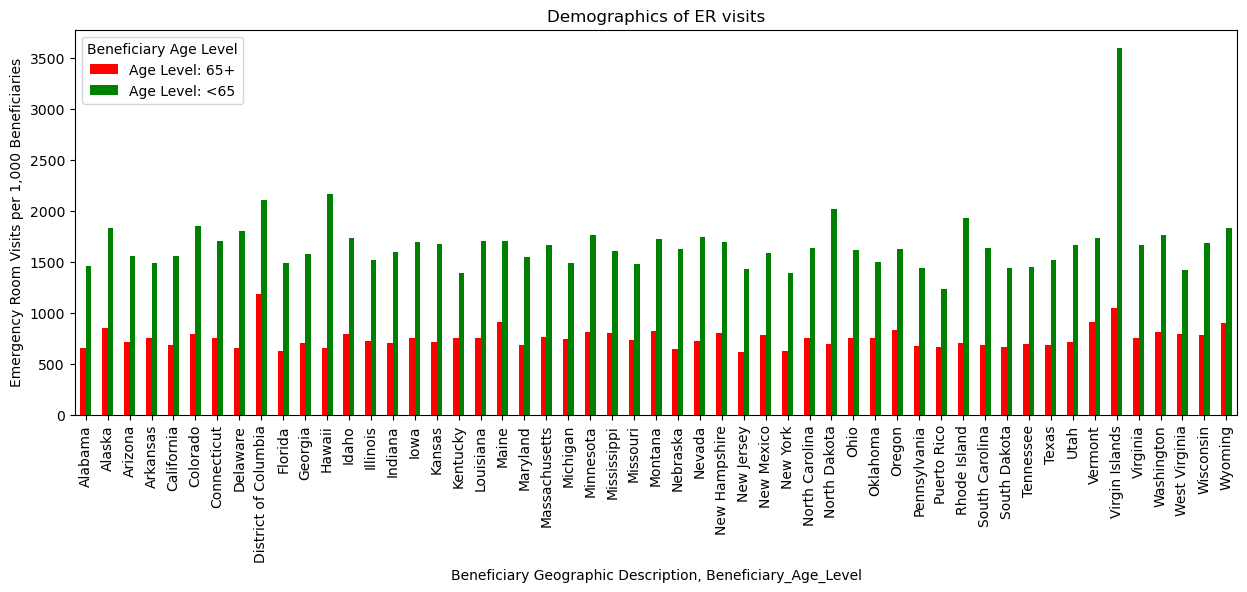

In [41]:
# Plot the bar chart using pandas
ax = mcc_df_state_by_age_aggregate_example_df.unstack('Beneficiary_Age_Level').plot.bar(
    color=['r', 'g'], figsize=(15, 5)
)

# Set the labels for the legend based on the 'Beneficiary_Age_Level' category
age_levels = mcc_df_state_by_age_aggregate_example_df.index.get_level_values('Beneficiary_Age_Level').unique()

legend_labels = [f"Age Level: {age}" for age in age_levels]

# Get the current legend handles and labels
handles, _ = ax.get_legend_handles_labels()

# Create a new legend with the desired labels
ax.legend(handles, legend_labels, title="Beneficiary Age Level")

# Customize other plot elements if needed
plt.title("Demographics of ER visits")
plt.xlabel("Beneficiary Geographic Description, Beneficiary_Age_Level")
plt.ylabel("Emergency Room Visits per 1,000 Beneficiaries")

# Show the plot
plt.show()


## Basic analysis on overall state data

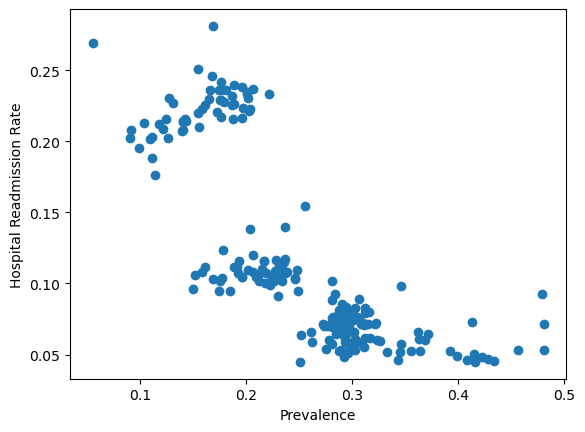

In [42]:
# Relationship between Prevalence and the rate of hospitalization for MCC
plt.scatter(mcc_state_df['Prevalence'], mcc_state_df['Hospital_Readmission_Rate'])
plt.xlabel('Prevalence')
plt.ylabel('Hospital Readmission Rate')
plt.show()

In [43]:
# aggregate across all multiple chronic conditions counts, get mean for some columns
mcc_df_state_by_age_aggregate_hosp_admit_df = filtered_state_by_age_df.groupby(["Beneficiary_Geographic_Description","Beneficiary_Age_Level"])["Hospital_Readmission_Rate"].mean()
mcc_df_state_by_age_aggregate_hosp_admit_df.head(4)

Beneficiary_Geographic_Description  Beneficiary_Age_Level
Alabama                             65+                      0.101500
                                    <65                      0.155400
Alaska                              65+                      0.101275
                                    <65                      0.142875
Name: Hospital_Readmission_Rate, dtype: float64

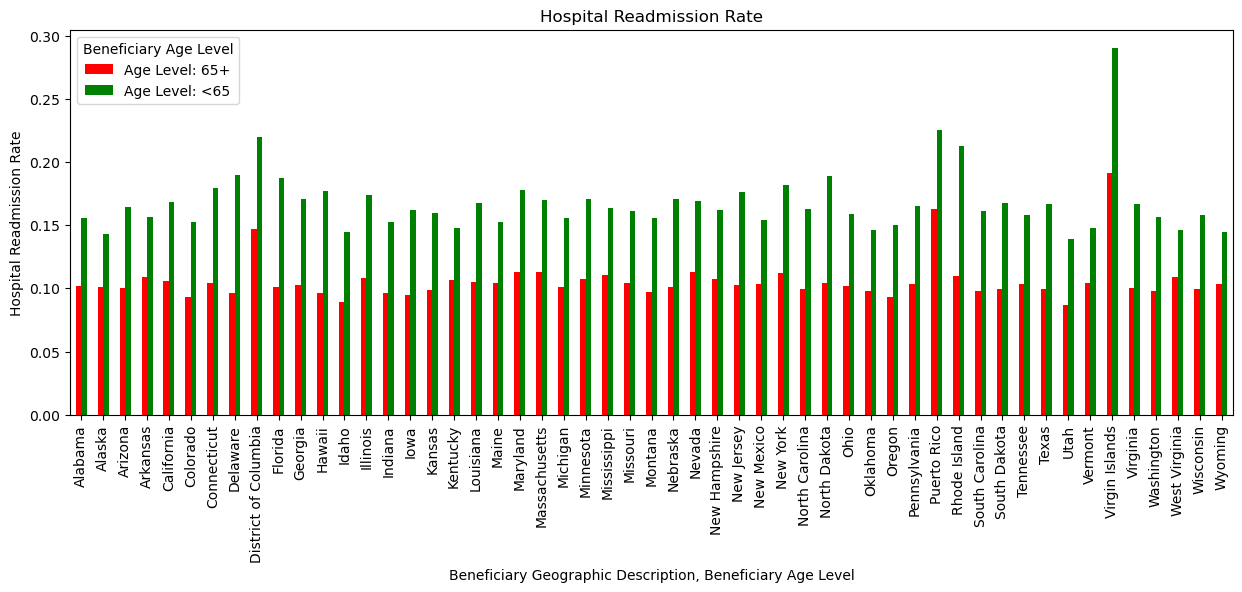

In [44]:
# Plot the bar chart using pandas
ax = mcc_df_state_by_age_aggregate_hosp_admit_df.unstack('Beneficiary_Age_Level').plot.bar(
    color=['r', 'g'], figsize=(15, 5)
)

# Set the labels for the legend based on the 'Beneficiary_Age_Level' category
age_levels = mcc_df_state_by_age_aggregate_hosp_admit_df.index.get_level_values('Beneficiary_Age_Level').unique()

legend_labels = [f"Age Level: {age}" for age in age_levels]

# Get the current legend handles and labels
handles, _ = ax.get_legend_handles_labels()

# Create a new legend with the desired labels
ax.legend(handles, legend_labels, title="Beneficiary Age Level")

# Customize other plot elements if needed
plt.title("Hospital Readmission Rate")
plt.xlabel("Beneficiary Geographic Description, Beneficiary Age Level")
plt.ylabel("Hospital Readmission Rate")

# Show the plot
plt.show()


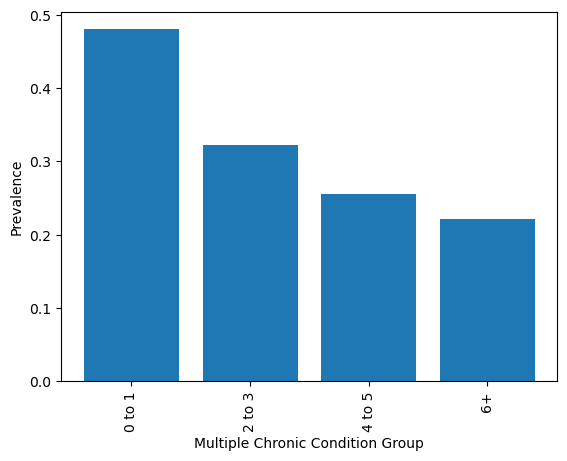

In [45]:
# Showing the relationship between the cases of MCC levels and prevalence of MCC
plt.bar(mcc_state_df['Beneficiary_Multiple_Chronic_Condition_Group'],mcc_state_df['Prevalence'])
plt.xlabel("Multiple Chronic Condition Group")
plt.xticks(rotation=90)
plt.ylabel("Prevalence")
plt.show()

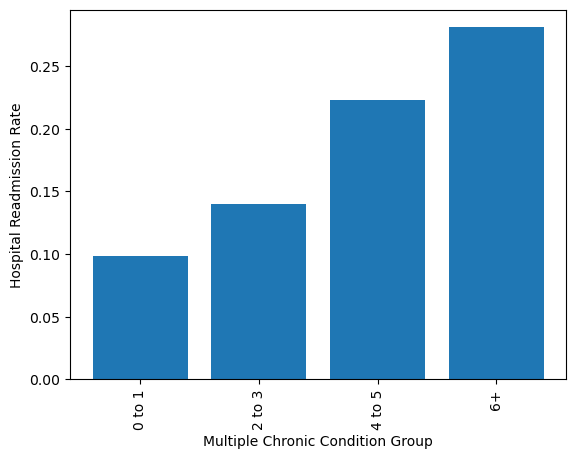

In [46]:
# Showing the relationship between the cases of MCC levels and Hospital_Readmission_Rate
plt.bar(mcc_state_df['Beneficiary_Multiple_Chronic_Condition_Group'], mcc_state_df['Hospital_Readmission_Rate'])
plt.xlabel("Multiple Chronic Condition Group")
plt.xticks(rotation=90)
plt.ylabel("Hospital Readmission Rate")
plt.show()

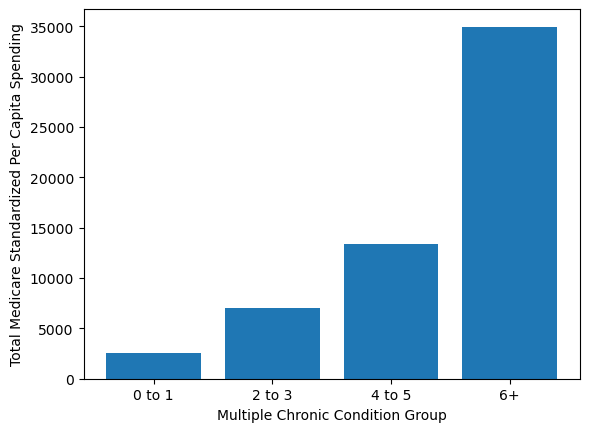

In [47]:
# Showing the relationship between the cases of MCC levels and Total_Medicare_Standardized_Per_Capita_Spending
plt.bar(mcc_state_df['Beneficiary_Multiple_Chronic_Condition_Group'], mcc_state_df['Total_Medicare_Standardized_Per_Capita_Spending'])
plt.xlabel("Multiple Chronic Condition Group")
plt.ylabel("Total Medicare Standardized Per Capita Spending")
plt.show()

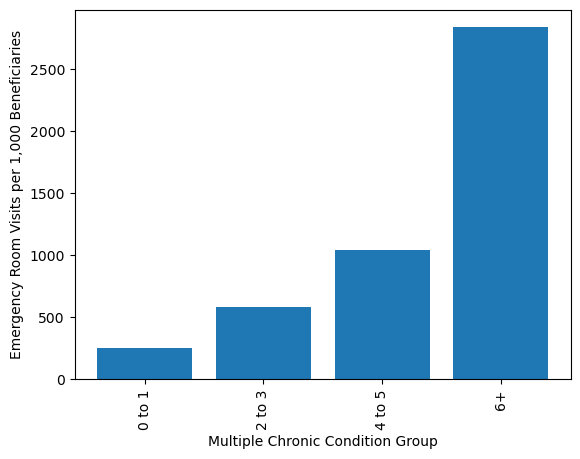

In [48]:
# Showing the relationship between the cases of MCC levels and Emergency_Room_Visits_per_1,000_Beneficiaries
plt.bar(mcc_state_df['Beneficiary_Multiple_Chronic_Condition_Group'], mcc_state_df['Emergency_Room_Visits_per_1,000_Beneficiaries'])
plt.xlabel("Multiple Chronic Condition Group")
plt.xticks(rotation=90)
plt.ylabel("Emergency Room Visits per 1,000 Beneficiaries")
plt.show()

### Observing the dataset at county level

In [49]:
# Make a dataframe based on County
mcc_county_df = mcc_df.loc[mcc_df["Beneficiary_Geographic_Level"] == "County"]
mcc_county_df = mcc_county_df.reset_index(drop=True)
print(mcc_county_df.shape)
mcc_county_df.head()

(38376, 12)


,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,County,Alabama : Autauga,01001,All,All,All,0 to 1,0.2746,2210.4664,1986.1032,NaN,206.1495
1,County,Alabama : Autauga,01001,All,All,All,2 to 3,0.2795,5779.4177,5124.0744,NaN,411.1187
2,County,Alabama : Autauga,01001,All,All,All,4 to 5,0.2477,9715.1652,8746.9833,0.0751,739.7366
3,County,Alabama : Autauga,01001,All,All,All,6+,0.1982,29804.7963,26863.0748,0.2564,2244.9177
4,County,Alabama : Baldwin,01003,All,All,All,0 to 1,0.2821,2100.8820,1916.7417,NaN,129.1382


In [50]:
# Filtering for 'All' at county level
mcc_county_by_age_df = mcc_df.loc[(mcc_df["Beneficiary_Geographic_Level"] == "County")\
                                          & (mcc_df["Beneficiary_Demographic_Level"] == "All") \
                                          & (mcc_df["Beneficiary_Age_Level"] == "All"), :]
print(mcc_state_by_age_df.shape)

(432, 12)


In [51]:
# creating a County column from the Beneficiary_Geographic_Description column
mcc_county_df["Beneficiary_Geographic_County"] = mcc_county_df["Beneficiary_Geographic_Description"].str.split(": ").str[1]
mcc_county_df.head()

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries",Beneficiary_Geographic_County
0,County,Alabama : Autauga,01001,All,All,All,0 to 1,0.2746,2210.4664,1986.1032,NaN,206.1495,Autauga
1,County,Alabama : Autauga,01001,All,All,All,2 to 3,0.2795,5779.4177,5124.0744,NaN,411.1187,Autauga
2,County,Alabama : Autauga,01001,All,All,All,4 to 5,0.2477,9715.1652,8746.9833,0.0751,739.7366,Autauga
3,County,Alabama : Autauga,01001,All,All,All,6+,0.1982,29804.7963,26863.0748,0.2564,2244.9177,Autauga
4,County,Alabama : Baldwin,01003,All,All,All,0 to 1,0.2821,2100.8820,1916.7417,NaN,129.1382,Baldwin


In [52]:
# converting the datatype of Beneficiary_Geographic_Code
mcc_county_df["Beneficiary_Geographic_Code"] = mcc_county_df["Beneficiary_Geographic_Code"].apply(pd.to_numeric, errors='coerce')
mcc_county_df.head()

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries",Beneficiary_Geographic_County
0,County,Alabama : Autauga,1001,All,All,All,0 to 1,0.2746,2210.4664,1986.1032,NaN,206.1495,Autauga
1,County,Alabama : Autauga,1001,All,All,All,2 to 3,0.2795,5779.4177,5124.0744,NaN,411.1187,Autauga
2,County,Alabama : Autauga,1001,All,All,All,4 to 5,0.2477,9715.1652,8746.9833,0.0751,739.7366,Autauga
3,County,Alabama : Autauga,1001,All,All,All,6+,0.1982,29804.7963,26863.0748,0.2564,2244.9177,Autauga
4,County,Alabama : Baldwin,1003,All,All,All,0 to 1,0.2821,2100.8820,1916.7417,NaN,129.1382,Baldwin


In [53]:
# creating a State code from Beneficiary_Geographic_Code to merge with geojson data later
# Using floor division to extract the State code
mcc_county_df.loc[:,"State_Code"] = mcc_county_df["Beneficiary_Geographic_Code"] // 1000
mcc_county_df.head()

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries",Beneficiary_Geographic_County,State_Code
0,County,Alabama : Autauga,1001,All,All,All,0 to 1,0.2746,2210.4664,1986.1032,NaN,206.1495,Autauga,1
1,County,Alabama : Autauga,1001,All,All,All,2 to 3,0.2795,5779.4177,5124.0744,NaN,411.1187,Autauga,1
2,County,Alabama : Autauga,1001,All,All,All,4 to 5,0.2477,9715.1652,8746.9833,0.0751,739.7366,Autauga,1
3,County,Alabama : Autauga,1001,All,All,All,6+,0.1982,29804.7963,26863.0748,0.2564,2244.9177,Autauga,1
4,County,Alabama : Baldwin,1003,All,All,All,0 to 1,0.2821,2100.8820,1916.7417,NaN,129.1382,Baldwin,1


In [54]:
# Rearranging the columns of mcc_county_df
mcc_county_df = mcc_county_df[["Beneficiary_Geographic_Level", "Beneficiary_Geographic_Description", \
                               "State_Code", "Beneficiary_Geographic_County", "Beneficiary_Geographic_Code", \
                               "Beneficiary_Age_Level", "Beneficiary_Demographic_Level", \
                               "Beneficiary_Demographic_Description", "Beneficiary_Multiple_Chronic_Condition_Group", 
                               "Prevalence", "Total_Medicare_Standardized_Per_Capita_Spending", \
                               "Total_Medicare_Per_Capita_Spending", "Hospital_Readmission_Rate", \
                               "Emergency_Room_Visits_per_1,000_Beneficiaries"]]
mcc_county_df.head()

,Beneficiary_Geographic_Level,Beneficiary_Geographic_Description,State_Code,Beneficiary_Geographic_County,Beneficiary_Geographic_Code,Beneficiary_Age_Level,Beneficiary_Demographic_Level,Beneficiary_Demographic_Description,Beneficiary_Multiple_Chronic_Condition_Group,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
0,County,Alabama : Autauga,1,Autauga,1001,All,All,All,0 to 1,0.2746,2210.4664,1986.1032,NaN,206.1495
1,County,Alabama : Autauga,1,Autauga,1001,All,All,All,2 to 3,0.2795,5779.4177,5124.0744,NaN,411.1187
2,County,Alabama : Autauga,1,Autauga,1001,All,All,All,4 to 5,0.2477,9715.1652,8746.9833,0.0751,739.7366
3,County,Alabama : Autauga,1,Autauga,1001,All,All,All,6+,0.1982,29804.7963,26863.0748,0.2564,2244.9177
4,County,Alabama : Baldwin,1,Baldwin,1003,All,All,All,0 to 1,0.2821,2100.8820,1916.7417,NaN,129.1382


In [55]:
# converting State_Code and Beneficiary_Geographic_Code back to str object dtype
mcc_county_df["State_Code"] = mcc_county_df["State_Code"].apply(str)
mcc_county_df["Beneficiary_Geographic_Code"] = mcc_county_df["Beneficiary_Geographic_Code"].apply(str)

mcc_county_df.describe()

,Prevalence,Total_Medicare_Standardized_Per_Capita_Spending,Total_Medicare_Per_Capita_Spending,Hospital_Readmission_Rate,"Emergency_Room_Visits_per_1,000_Beneficiaries"
count,34992.000000,34968.000000,34968.000000,19968.000000,33280.000000
mean,0.249314,12534.377586,12789.767056,0.124930,1043.465019
std,0.086145,11425.781345,11992.028707,0.096249,941.349770
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.187900,3701.629300,3610.721300,0.048000,351.340350
50%,0.247600,8623.887000,8543.311100,0.111050,704.105150
75%,0.298200,20828.810275,21330.442525,0.207500,1637.625525
max,0.614200,99351.462500,102920.896500,0.485100,7777.777800


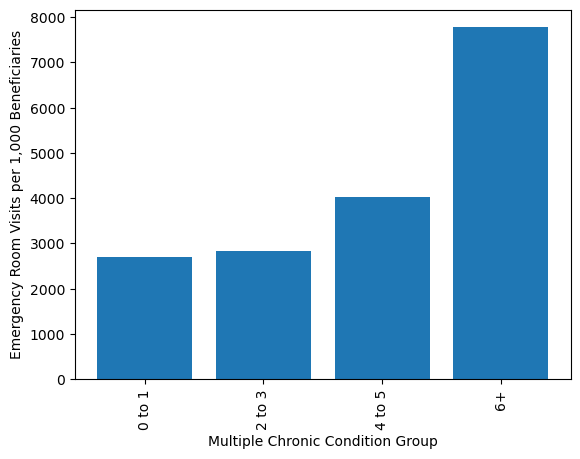

In [56]:
# Showing the relationship between the cases of MCC levels and Emergency_Room_Visits_per_1,000_Beneficiaries
plt.bar(mcc_county_df['Beneficiary_Multiple_Chronic_Condition_Group'], mcc_county_df['Emergency_Room_Visits_per_1,000_Beneficiaries'])
plt.xlabel("Multiple Chronic Condition Group")
plt.xticks(rotation=90)
plt.ylabel("Emergency Room Visits per 1,000 Beneficiaries")
plt.show()

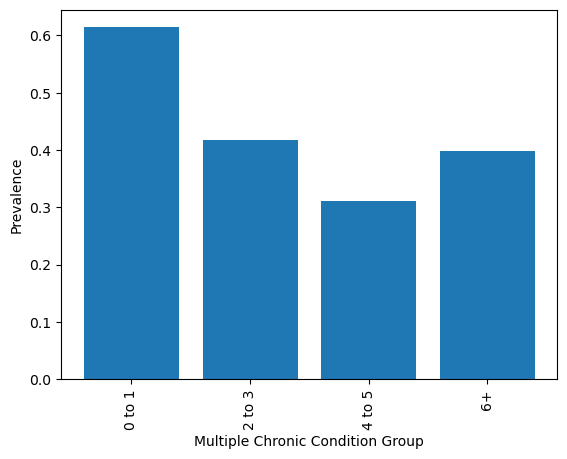

In [57]:
# Showing the relationship between the cases of MCC levels and prevalence of MCC
plt.bar(mcc_county_df['Beneficiary_Multiple_Chronic_Condition_Group'], mcc_county_df['Prevalence'])
plt.xlabel("Multiple Chronic Condition Group")
plt.xticks(rotation=90)
plt.ylabel("Prevalence")
plt.show()

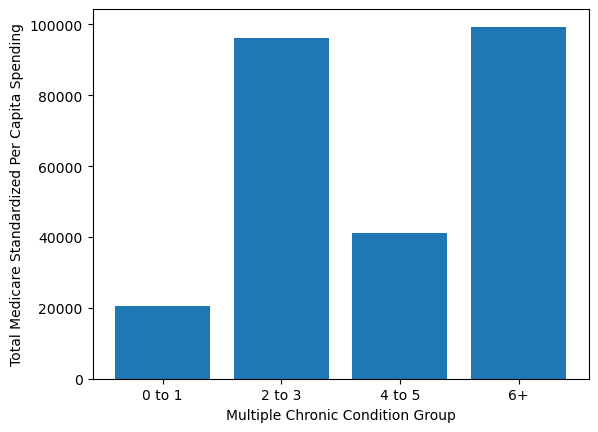

In [58]:
# Showing the relationship between the cases of MCC levels and Total_Medicare_Standardized_Per_Capita_Spending
plt.bar(mcc_county_df['Beneficiary_Multiple_Chronic_Condition_Group'], mcc_county_df['Total_Medicare_Standardized_Per_Capita_Spending'])
plt.xlabel("Multiple Chronic Condition Group")
plt.ylabel("Total Medicare Standardized Per Capita Spending")
plt.show()

# Showing the relationship between the cases of MCC levels and Hospital_Readmission_Rate
plt.bar(mcc_county_df['Beneficiary_Multiple_Chronic_Condition_Group'], mcc_state_df['Hospital_Readmission_Rate'])
plt.xlabel("Multiple Chronic Condition Group")
plt.xticks(rotation=90)
plt.ylabel("Hospital Readmission Rate")
plt.show()

## References
https://www.statology.org/pandas-convert-object-to-float/

https://geopandas.org/en/stable/docs/user_guide/mapping.html
    